In [1]:
!pip install -U transformers
!pip install datasets
!pip install -U accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 38.6 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 330.3/330.3 KB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.0/774.0 KB 41.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 55.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 55.7 MB/s eta 0:00:00 MB/s eta 0:00:01
  Using cached tqdm-4.66.1-py3-none-any.whl (78 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.0/169.0 KB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 KB 10.0 MB/s eta 0:00:006.2 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 KB 45.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.0/38.0 MB 24.6 MB/s eta 0:00:00m eta 0:00:010:01:01
  Using cached multiprocess-0.70.15-py310-none-any.whl (134 kB)
  Using cached dill-0.3.7-py3-none-any.whl (115 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import numpy as np
import tempfile
from datasets import load_dataset
from transformers import GPT2Tokenizer, GPT2LMHeadModel, TrainingArguments, Trainer

/home/peterdays/Documents/personal/Volupal/ElevaQ/env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# Load the DailyDialog dataset
dataset = load_dataset('daily_dialog')

Generating test split: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 107825.50 examples/s]


In [4]:
raw_train_dataset = dataset["train"]
raw_train_dataset[0]

{'dialog': ['Say , Jim , how about going for a few beers after dinner ? ',
  ' You know that is tempting but is really not good for our fitness . ',
  ' What do you mean ? It will help us to relax . ',
  " Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ? ",
  " I guess you are right.But what shall we do ? I don't feel like sitting at home . ",
  ' I suggest a walk over to the gym where we can play singsong and meet some of our friends . ',
  " That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them . ",
  ' Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too . ',
  " Good.Let ' s go now . ",
  ' All right . '],
 'act': [3, 4, 2, 2, 2, 3, 4, 1, 3, 4],
 'emotion': [0, 0, 0, 0, 0, 0, 4, 4, 4, 4]}

In [5]:
# Concatenate all utterances within a dialogue and map to 'dialog' key
def concatenate_utterances(example):
    example['dialog'] = " ".join(example['dialog'])
    return example

# Apply the function to all examples in the dataset
dataset = dataset.map(concatenate_utterances)

Map: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 11943.46 examples/s]


In [8]:
dataset["train"][0]

{'dialog': "Say , Jim , how about going for a few beers after dinner ?   You know that is tempting but is really not good for our fitness .   What do you mean ? It will help us to relax .   Do you really think so ? I don't . It will just make us fat and act silly . Remember last time ?   I guess you are right.But what shall we do ? I don't feel like sitting at home .   I suggest a walk over to the gym where we can play singsong and meet some of our friends .   That's a good idea . I hear Mary and Sally often go there to play pingpong.Perhaps we can make a foursome with them .   Sounds great to me ! If they are willing , we could ask them to go dancing with us.That is excellent exercise and fun , too .   Good.Let ' s go now .   All right . ",
 'act': [3, 4, 2, 2, 2, 3, 4, 1, 3, 4],
 'emotion': [0, 0, 0, 0, 0, 0, 4, 4, 4, 4]}

# make my own dataset

In [ ]:
# https://huggingface.co/learn/nlp-course/chapter5/5

data extracted from here:
https://www.oern.pt/legislacao/64/ascensores-monta-cargas-escadas-mecanicas-e-tapetes-rolantes

## scrapping the datasets

In [9]:
pip install tabula-py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 11.8 MB/s eta 0:00:00m eta 0:00:010:00:01
Note: you may need to restart the kernel to use updated packages.


In [10]:
import tabula as tb

In [ ]:
path = "data/0000400206.pdf"
data = tb.read_pdf(path, area = (300, 0, 600, 800), pages = Ƈ')

# PdfPlumber

In [1]:
import pdfplumber
import json

path = "data/0000400206.pdf"
path = "data/DL320_2002.pdf"
with pdfplumber.open(path) as pdf:
    pages = pdf.pages

    text = pages[0].extract_text_simple(x_tolerance=3, y_tolerance=3)
    text1 = pages[0].extract_text(x_tolerance=3, y_tolerance=3, layout=False, x_density=7.25, y_density=13)


## two column sided

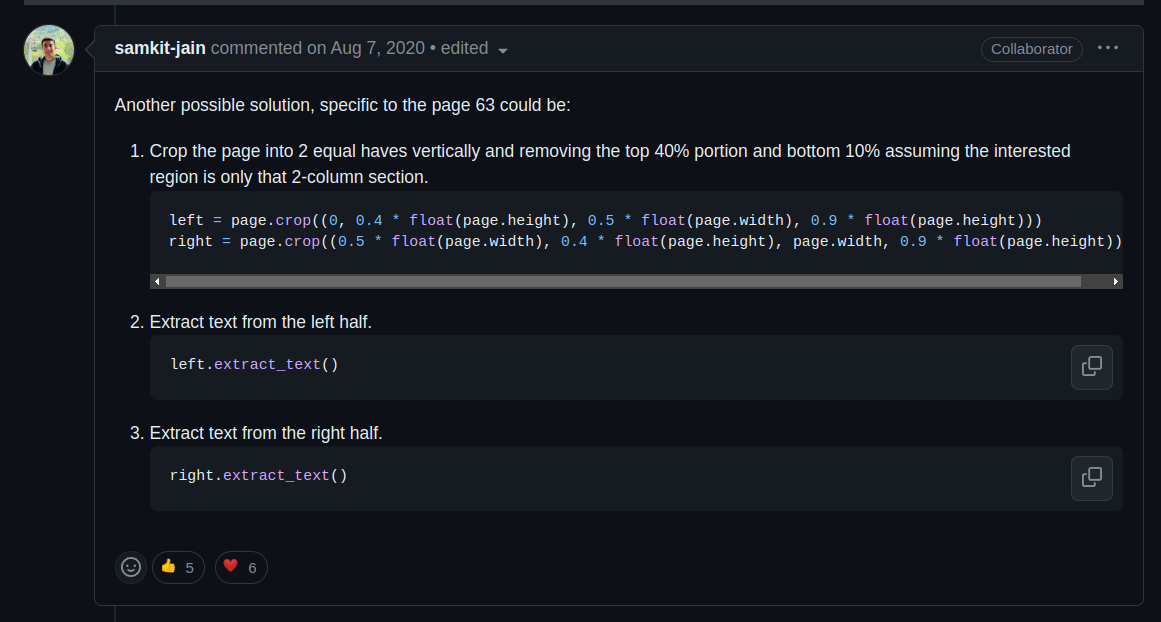

https://github.com/jsvine/pdfplumber/issues/244

In [2]:
def extract_two_columns(pdf_path, save=True):
    all_texts = []
    with pdfplumber.open(pdf_path) as pdf:
        pages = pdf.pages

        for page in pages:
            left = page.crop((0, 0, 0.5 * float(page.width), float(page.height)))
            right = page.crop((0.5 * float(page.width), 0, page.width, float(page.height)))

            # rough paragraph division and new line replace
            left = left.extract_text().split(".\n")
            left = [p.replace("\n", " ") for p in left]

            right = right.extract_text().split(".\n")
            right = [p.replace("\n", " ") for p in right]

            both = right + left
            all_texts.append({"page": page.page_number,
                              "text": both})
    if save:
        with open(pdf_path.replace(".pdf", ".json"), 'w', encoding='utf-8') as f:
            json.dump(all_texts, f, ensure_ascii=False, indent=4)
    return all_texts

> Note: One can probably use the properties of the char to understand if the text/line is a title or not. For now this will do
> 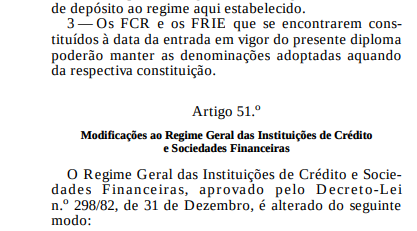

In [3]:
# two columns paths

two_cols_paths = ["data/DL320_2002.pdf", "data/0288702916.pdf",
                  "data/0331103315.pdf", "data/DL103_2008.pdf",
                  "data/DLR4_2012_A.pdf", "data/DLR4_2012_A.pdf",
                  "data/dlr7_2016-m.pdf", "data/L65_2013.pdf"]

for path in two_cols_paths:
    extract_two_columns(path, save=True)